# Hand Gesture Recognition using Leap Motion Sensor

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [3]:
data=pd.read_csv("BBV.CSV")

# Data 

#COSMI- MIDDLE FINGER AND INDEX FINGER
#COSPR-PINKY FINGER AND RING FINGER
#COSRM-RING FINGER AND MIDDLE FINGER

#d1-distance from palm centre to tip of thumb
#d2-distance from palm centre to tip of index finger
#d3-distance from palm centre to tip of middle finger
#d4-distance from palm centre to tip of ring finger
#d5-distance from palm centre to tip of pinky finger
#d6-distance from pinky finger to ring finger
#d7-distance from ring finger to middle finger
#d8-distance from middle finger to index finger


In [36]:
data.head(20)



,cosmi,cospr,cosrm,d1,d2,d3,d4,d5,d6,d7,d8,Alphabet
0,0.981020,0.984024,0.981728,14.588637,36.743969,25.098079,23.956453,43.922804,19.917515,20.849653,20.831616,A
1,0.989697,0.986576,0.980025,48.687866,49.341249,45.003977,37.633224,32.341337,16.177564,15.222451,10.290461,A
2,0.981275,0.994738,0.985409,58.846428,48.782098,44.554866,36.675178,40.557811,15.352751,10.486557,11.078349,A
3,0.975888,0.992271,0.988816,54.662181,43.004875,38.452685,32.377231,55.106956,13.719385,10.190925,12.601386,A
4,0.981020,0.984024,0.981728,14.588637,36.743969,25.098079,23.956453,43.922804,19.917515,20.849653,20.831616,A
5,0.989697,0.986576,0.980025,48.687866,49.341249,45.003977,37.633224,32.341337,16.177564,15.222451,10.290461,A
6,0.981275,0.994738,0.985409,58.846428,48.782098,44.554866,36.675178,40.557811,15.352751,10.486557,11.078349,A
7,0.975888,0.992271,0.988816,54.662181,43.004875,38.452685,32.377231,55.106956,13.719385,10.190925,12.601386,A
8,0.981020,0.984024,0.981728,14.588637,36.743969,25.098079,23.956453,43.922804,19.917515,20.849653,20.831616,A
9,0.989697,0.986576,0.980025,48.687866,49.341249,45.003977,37.633224,32.341337,16.177564,15.222451,10.290461,A


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cosmi     5200 non-null   float64
 1   cospr     5200 non-null   float64
 2   cosrm     5200 non-null   float64
 3   d1        5200 non-null   float64
 4   d2        5200 non-null   float64
 5   d3        5200 non-null   float64
 6   d4        5200 non-null   float64
 7   d5        5200 non-null   float64
 8   d6        5200 non-null   float64
 9   d7        5200 non-null   float64
 10  d8        5200 non-null   float64
 11  Alphabet  5200 non-null   object 
dtypes: float64(11), object(1)
memory usage: 487.6+ KB


In [8]:
data.columns


Index(['cosmi', 'cospr', 'cosrm', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7',
       'd8', 'Alphabet'],
      dtype='object')

In [11]:
data.shape

(5200, 12)

In [59]:
data['Alphabet'].value_counts()

Z    200
K    200
G    200
S    200
N    200
L    200
V    200
M    200
Q    200
B    200
O    200
E    200
I    200
R    200
J    200
C    200
F    200
U    200
D    200
Y    200
A    200
P    200
X    200
H    200
W    200
T    200
Name: Alphabet, dtype: int64

EVERY ALPHABET HAS 200 ROWS, SO THERE IS NO IMBALANCE OF DATA

In [54]:
#lets label Alphabets to Numerical values
data1=data.replace({'A':1, 'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26})
data1.head()

,cosmi,cospr,cosrm,d1,d2,d3,d4,d5,d6,d7,d8,Alphabet
0,0.981020,0.984024,0.981728,14.588637,36.743969,25.098079,23.956453,43.922804,19.917515,20.849653,20.831616,1
1,0.989697,0.986576,0.980025,48.687866,49.341249,45.003977,37.633224,32.341337,16.177564,15.222451,10.290461,1
2,0.981275,0.994738,0.985409,58.846428,48.782098,44.554866,36.675178,40.557811,15.352751,10.486557,11.078349,1
3,0.975888,0.992271,0.988816,54.662181,43.004875,38.452685,32.377231,55.106956,13.719385,10.190925,12.601386,1
4,0.981020,0.984024,0.981728,14.588637,36.743969,25.098079,23.956453,43.922804,19.917515,20.849653,20.831616,1


# EXPLORATORY DATA ANAYSIS

Exploring and visualizing the data:
1. Univariate Analysis
2. Bivariate Analysis


0.9666596308669233
0.991121565
0.999984744
0.9801810759999999
0.9958696359999999
0.015688559999999963


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


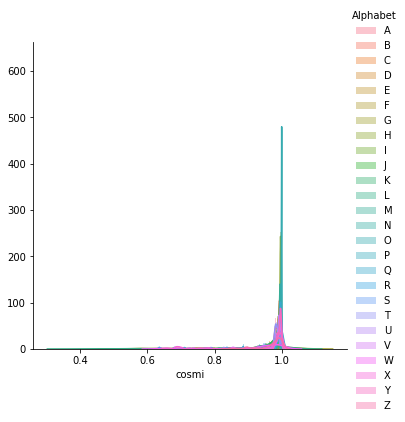

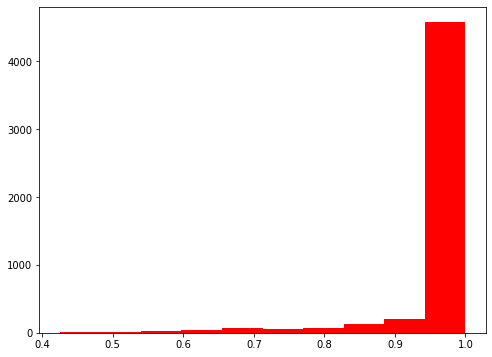

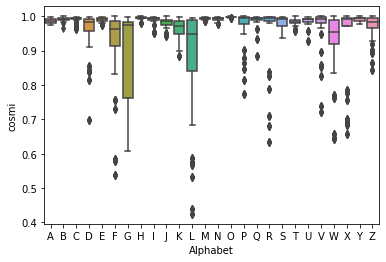

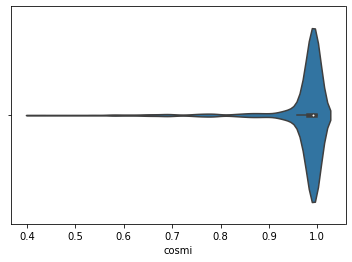

In [77]:
#univariate analysis
#cosmi

a=np.mean(data1['cosmi'])#mean
print(a)

b=np.median(data1['cosmi'])#median
print(b)

c=max(data1['cosmi']) #maximum value
print(c)

d=np.percentile(data1['cosmi'],25)#25th percentile
print(d)

e=np.percentile(data1['cosmi'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['cosmi']) #interqunatile range
print(f)


sns.FacetGrid(data, hue='Alphabet',size=5)\
.map(sns.distplot, 'cosmi',kde='True').add_legend()
plt.show()


plt.figure(figsize=(8,6))
plt.hist(data['cosmi'],facecolor='r')

plt.show()

sns.boxplot(x='Alphabet', y='cosmi', data=data)
plt.show()

sns.violinplot(x='cosmi', data=data)
plt.show()

# observation

1. 75% of the total cosmi values lie below 0.9958696359999999
2. 25% of the total cosmi values lie below 0.9801810759999999
3. 50% values of cosmi lie between 0.9958696359999999 to 0.9801810759999999
4. Interquantile range is very very small.
5. We know that each alphabet has 200 rows, so we can say most alphabets has
   cosmi (cosine distnace between middle and index finger is between 0.98 to      0.99)
6. From the box plot also , it is clear that if we take cosmi as a feature into    consideration, we will be only able to classify alphabets like D,F,G,L,W.
   Rest all are quite similar and very difficult to differeniate.
   
7. Violin plot combines the pdf and box plot, from the vioin plot it is very      much clear that most of the values of cosmi lies between 0.98 to 0.99

0.9805886142734571
0.9932241960000001
0.9999900759999999
0.987696502
0.9968337740000001
0.9984799040000001
0.00913727200000003


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


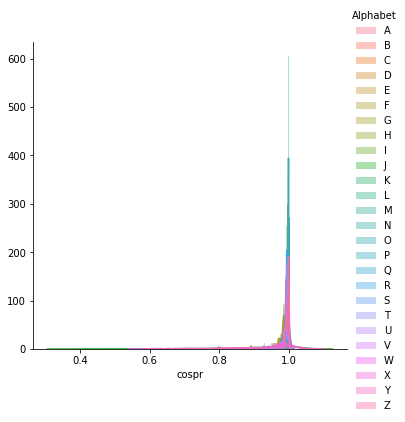

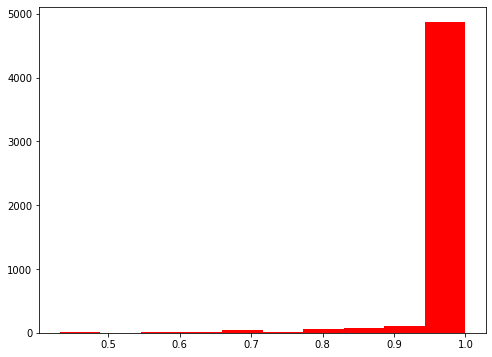

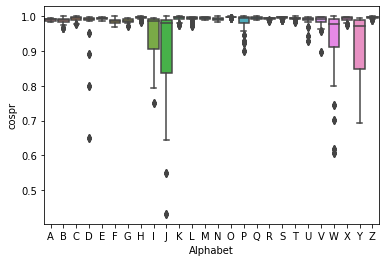

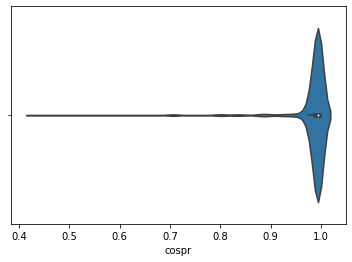

In [90]:
#cospr

a=np.mean(data1['cospr'])#mean
print(a)

b=np.median(data1['cospr'])#median
print(b)

c=max(data1['cospr']) #maximum value
print(c)

d=np.percentile(data1['cospr'],25)#25th percentile
print(d)

e=np.percentile(data1['cospr'],75)#75th percentile
print(e)

i=np.percentile(data1['cospr'],90)#90th percentile
print(i) 

f=scipy.stats.iqr(data1['cospr']) #interqunatile range
print(f)


sns.FacetGrid(data, hue='Alphabet',size=5)\
.map(sns.distplot, 'cospr',kde='True').add_legend()
plt.show()


plt.figure(figsize=(8,6))
plt.hist(data['cospr'],facecolor='r')

plt.show()

sns.boxplot(x='Alphabet', y='cospr', data=data)
plt.show()

sns.violinplot(x='cospr', data=data)
plt.show()

# observation

1. 75% of the total cospr values lie below 0.9968337740000001
2. 25% of the total cospr values lie below 0.987696502
3. 50% values of cospr lie between 0.9968337740000001 to 0.987696502
4. Interquantile range is very very small.(0.0091)
5. We know that each alphabet has 200 rows, so we can say most alphabets has
   cospr (cosine distnace between pinky and ring finger is between 0.987 to        0.996)
6. From the box plot also ,cospr as a feature,alphabets J,I,W,Y like have a        wide range of values, other alphabets range lie very close to 0.9
 
7. Violin plot combines the pdf and box plot, from the vioin plot it is very      much clear that most of the values of cosmi lies between 0.987 to 0.996



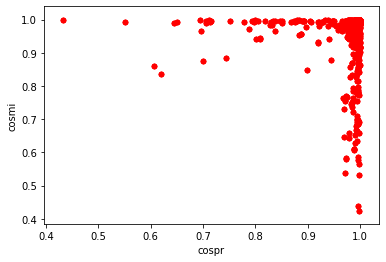

In [87]:
#SCATTER PLOT BETWEEN COSMI AND COSPR
data.plot.scatter(x='cospr', y='cosmi',c='red')
plt.show()

# observation

 1. After 0.9 of cospr, we can see that for same values of cospr, we have           different values of cosmi, in a very short interval we have different           values of cosmi and there are also rows where these values are almost same.

0.967606423845385
0.990102809
0.9999985999999998
0.98277232
0.995422645
0.012650324999999962


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


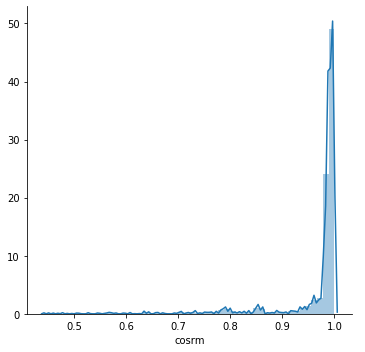

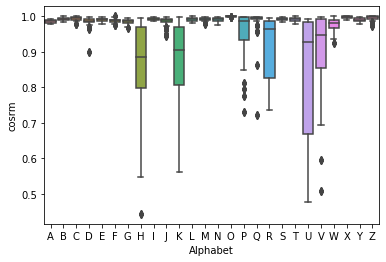

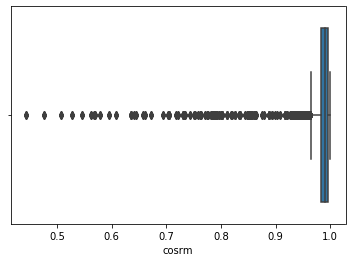

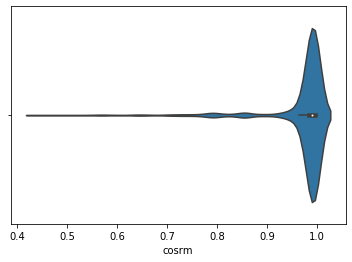

In [99]:
#cosrm

a=np.mean(data1['cosrm'])#mean
print(a)

b=np.median(data1['cosrm'])#median
print(b)

c=max(data1['cosrm']) #maximum value
print(c)

d=np.percentile(data1['cosrm'],25)#25th percentile
print(d)

e=np.percentile(data1['cosrm'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['cosrm']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'cosrm',kde='True').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='cosrm', data=data)
plt.show()

sns.boxplot(x=data['cosrm'])
plt.show()

sns.violinplot(x='cosrm', data=data)
plt.show()

# observation

1. 75% of the total cosrm values lie below 0.995422645
2. 25% of the total cosrm values lie below 0.98277232
3. 50% values of cosrm lie between 0.995422645  to 0.98277232
4. Interquantile range is very very small.(0.012650324999999962)
5. We know that each alphabet has 200 rows, so we can say most alphabets has
   cosrm (cosine distnace between ring finger and middle finger is between        0.982 to 0.995)
6. From the box plot, we can see some variation in some alphabets like            U,V,R,W,P. In previous box plots, they had a very restricted range normally    close to 0.9.
7. Violin plot combines the pdf and box plot, from the vioin plot it is very      much clear that most of the values of cosrm lies between 0.982 to 0.995





56.61574780942318
55.686688285
130.10100549999999
40.1064773525
73.896803165
33.790325812499994


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


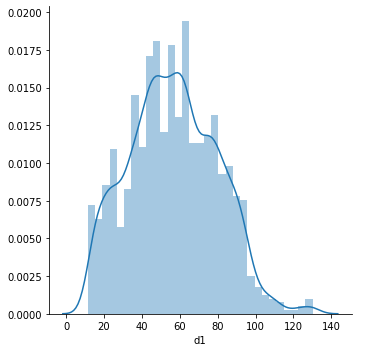

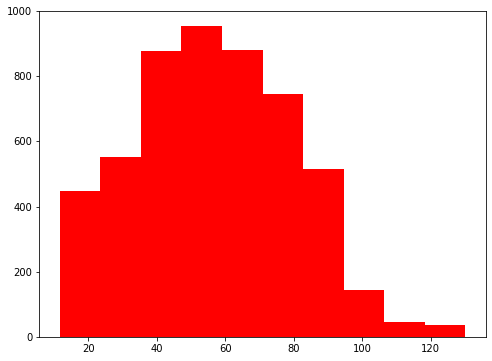

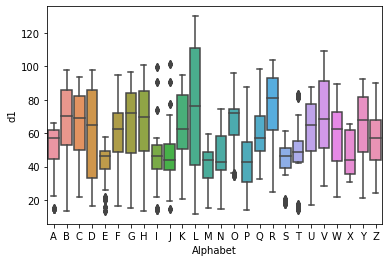

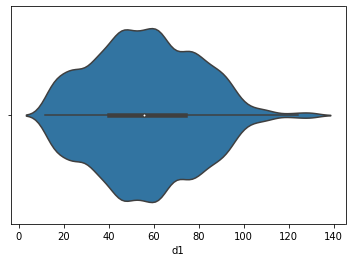

In [96]:
#d1
#d1-distance from palm centre to tip of thumb


a=np.mean(data1['d1'])#mean
print(a)

b=np.median(data1['d1'])#median
print(b)

c=max(data1['d1']) #maximum value
print(c)

d=np.percentile(data1['d1'],25)#25th percentile
print(d)

e=np.percentile(data1['d1'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d1']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd1').add_legend()
plt.show()


plt.figure(figsize=(8,6))
plt.hist(data['d1'],facecolor='r')

plt.show()

sns.boxplot(x='Alphabet', y='d1', data=data)
plt.show()

#sns.boxplot(data['d1'])
#plt.show()

sns.violinplot(x='d1', data=data)
plt.show()

# observation

1. 75% of the total d1 values lie below 73.8968

2. 25% of the total d1 values lie below 40.1064

3. 50% values of d1 lie between  73.8968 to 40.1064

4. Interquantile range is 33.790325812499994

5. From the box plot , we can see every alphabet has a different range of d1,we can see alphabets like E,I ,J,S AND T have almost same d1 range, we can assume the d1(distance between palm and tip of thumb) in these alphabets are quite similar.

6. Violin plot combines the pdf and box plot, from the vioin plot it is very much clear that most of the values of d1 values lies between 40 to 75 and there are very less values between after 100


53.805441120826885
49.11791704
140.92396269999998
35.6709169825
66.35314643
30.682229447499992


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


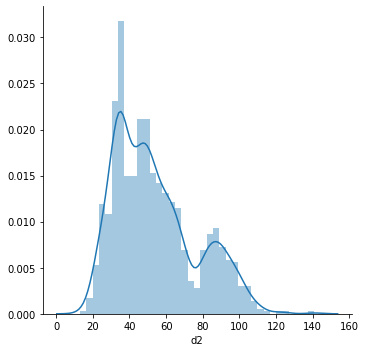

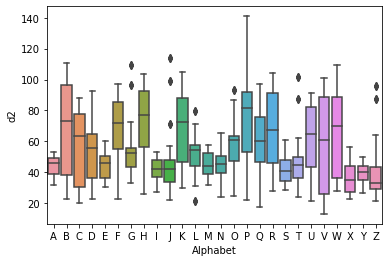

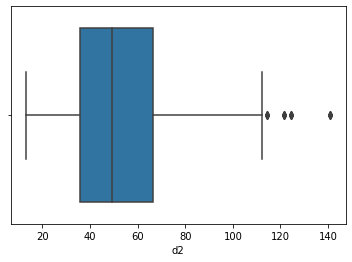

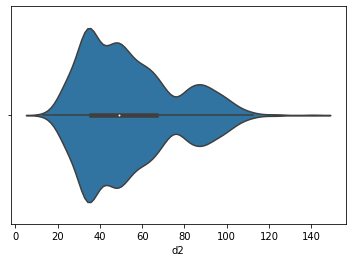

In [101]:
# d2
#d2-distance from palm centre to tip of index finger

a=np.mean(data1['d2'])#mean
print(a)

b=np.median(data1['d2'])#median
print(b)

c=max(data1['d2']) #maximum value
print(c)

d=np.percentile(data1['d2'],25)#25th percentile
print(d)

e=np.percentile(data1['d2'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d2']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd2').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d2', data=data)
plt.show()

sns.boxplot(data['d2'])
plt.show()

sns.violinplot(x='d2', data=data)
plt.show()

# observation


1. 75% of the total d2 values lie below 66.35314643

2. 25% of the total d2 values lie below 35.6709169825

3. 50% values of d2 lie between 66.35314643 to 35.6709169825

4. Interquantile range is 30.682229447499992

5. From the box plot , we can see every alphabet has a different range of d2,we can see alphabets like A,E,G,I ,J,N,S, T,X,Y,Z have almost same d2 range, we can assume the d2(distance from palm centre to tip of index finger ) in these alphabets are quite similar.

6. Violin plot combines the pdf and box plot, from the vioin plot it is very much clear that most of the values of d2 values lies between 35 to 67 and there are very less values between after 100



C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


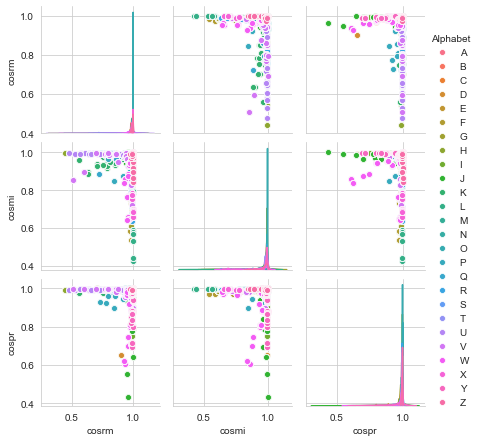

In [110]:
#lets plot the pairplot between the cosine distances between fingers

x=data[["cosrm", "cosmi", "cospr", "Alphabet"]]

sns.set_style("whitegrid");
sns.pairplot(x,hue="Alphabet", size=2);
plt.show()

# observation

Here we have mainly 3 plots, 
1. cosmi vs cosrm- very clear clusters of color are there when it comes to alphabet after H, here picture is not clear for Alphabets A to H, very few points can be seen.
   

2. cosmi vs cospr- Here things get a bit complex, green dots are spread all over( from J to P), here from alphabet N to U, there are very less points.

3. cospr vs cosrm- Very few points for alphabet A to H, otherwise clusters are forming.



C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


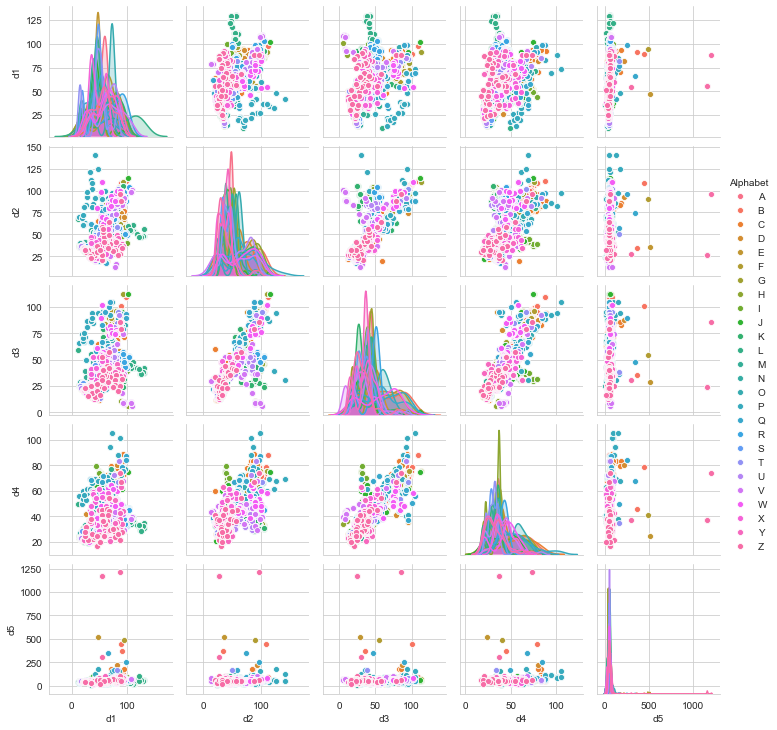

In [112]:
#lets plot scatter plot between distances between the centre 
#And tip of fingers(d1,d2,d3,d4)

y=data[["d1", "d2", "d3", "d4","d5" ,"Alphabet"]]

sns.set_style("whitegrid");
sns.pairplot(y,hue="Alphabet", size=2);
plt.show()

# observation

C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


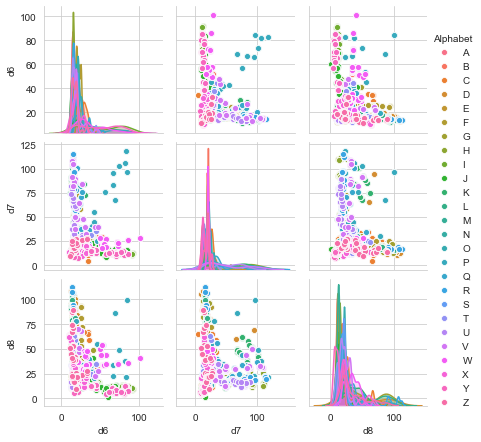

In [113]:
#lets plot scatter plot between distances between the tips of fingers

z=data[["d6", "d7", "d8", "Alphabet"]]

sns.set_style("whitegrid");
sns.pairplot(z,hue="Alphabet", size=2);
plt.show()

# observation

42.776711528846356
40.32177794
112.39531470000001
26.89904224
50.90140165
24.002359409999997


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


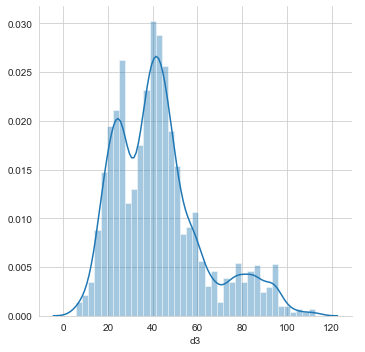

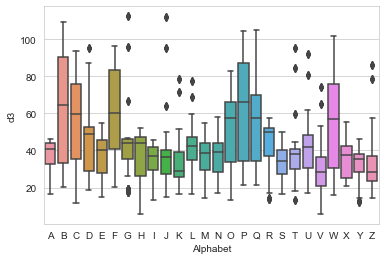

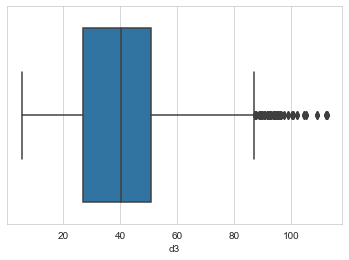

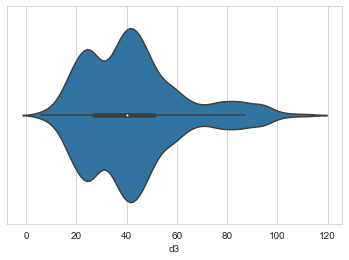

In [114]:
# d3
#d3-distance from palm centre to tip of middle finger

a=np.mean(data1['d3'])#mean
print(a)

b=np.median(data1['d3'])#median
print(b)

c=max(data1['d3']) #maximum value
print(c)

d=np.percentile(data1['d3'],25)#25th percentile
print(d)

e=np.percentile(data1['d3'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d3']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd3').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d3', data=data)
plt.show()

sns.boxplot(data['d3'])
plt.show()

sns.violinplot(x='d3', data=data)
plt.show()

# observation


40.589975453678676
37.57540902
105.31889960000001
30.35526113
47.9925682
17.637307070000002


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


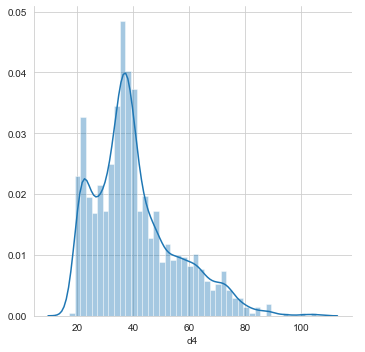

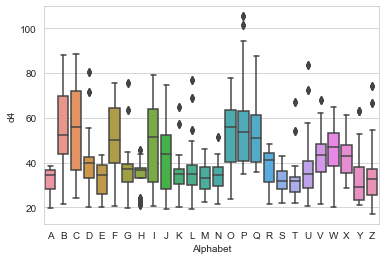

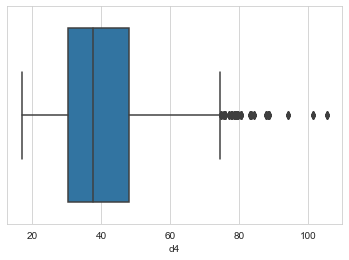

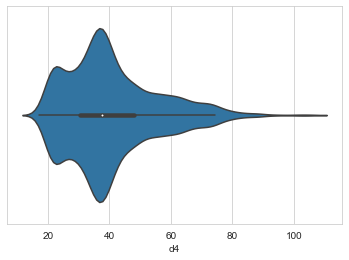

In [115]:
#d4

a=np.mean(data1['d4'])#mean
print(a)

b=np.median(data1['d4'])#median
print(b)

c=max(data1['d4']) #maximum value
print(c)

d=np.percentile(data1['d4'],25)#25th percentile
print(d)

e=np.percentile(data1['d4'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d4']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd4').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d4', data=data)
plt.show()

sns.boxplot(data['d4'])
plt.show()

sns.violinplot(x='d4', data=data)
plt.show()

# observation

54.03482434850193
52.68815708
1209.518587
44.2834546375
60.19374407
15.9102894325


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


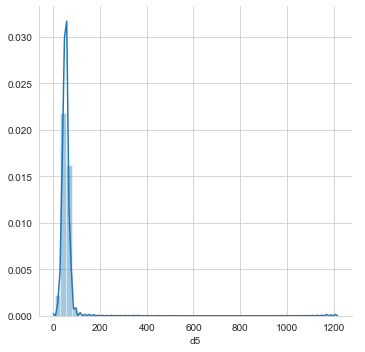

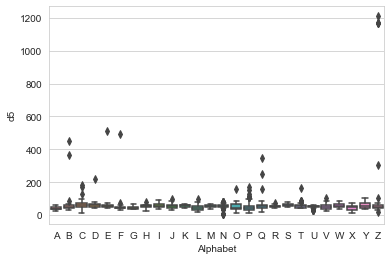

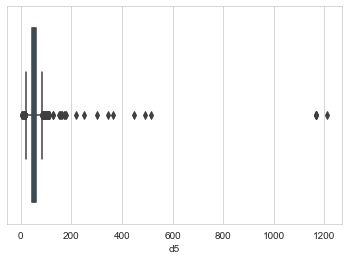

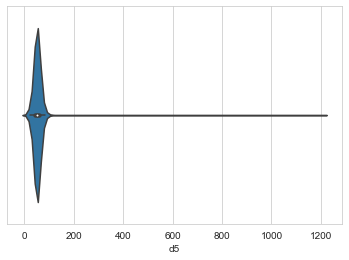

In [116]:
#d5

a=np.mean(data1['d5'])#mean
print(a)

b=np.median(data1['d5'])#median
print(b)

c=max(data1['d5']) #maximum value
print(c)

d=np.percentile(data1['d5'],25)#25th percentile
print(d)

e=np.percentile(data1['d5'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d5']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd5').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d5', data=data)
plt.show()

sns.boxplot(data['d5'])
plt.show()

sns.violinplot(x='d5', data=data)
plt.show()

# observation

23.989944135049978
19.72983159
100.96667540000001
16.199290419999997
23.47291923
7.273628810000002


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


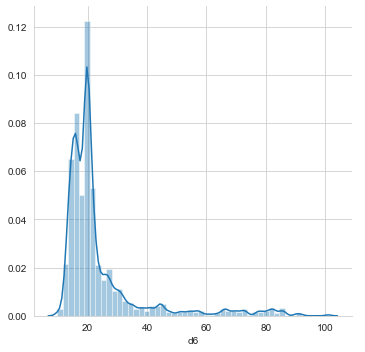

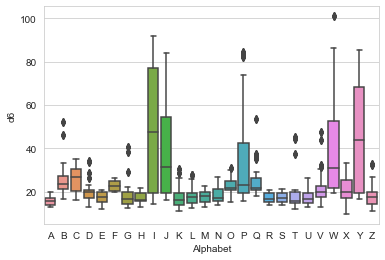

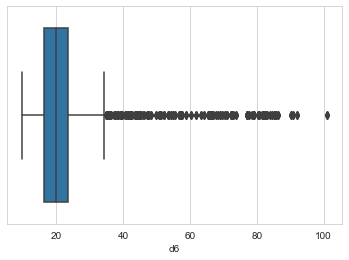

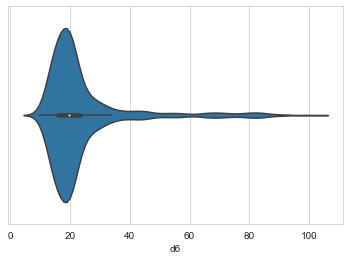

In [118]:
# d6

a=np.mean(data1['d6'])#mean
print(a)

b=np.median(data1['d6'])#median
print(b)

c=max(data1['d6']) #maximum value
print(c)

d=np.percentile(data1['d6'],25)#25th percentile
print(d)

e=np.percentile(data1['d6'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d6']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd6').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d6', data=data)
plt.show()

sns.boxplot(data['d6'])
plt.show()

sns.violinplot(x='d6', data=data)
plt.show()

# observation

27.47525834146556
20.74999971
117.9369949
16.401633689999997
25.0729253125
8.671291622500004


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


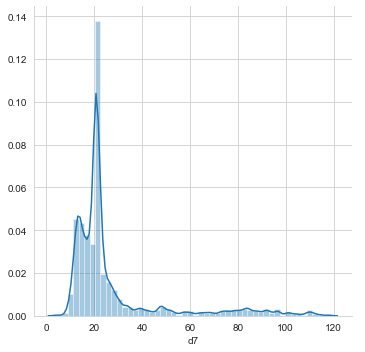

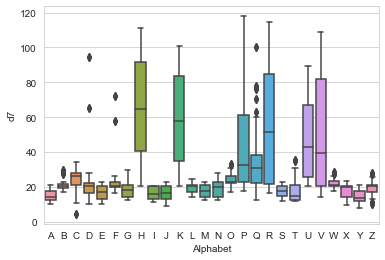

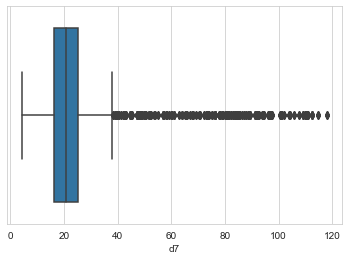

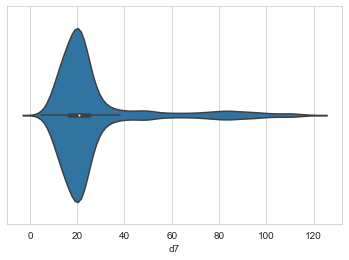

In [120]:
#d7

a=np.mean(data1['d7'])#mean
print(a)

b=np.median(data1['d7'])#median
print(b)

c=max(data1['d7']) #maximum value
print(c)

d=np.percentile(data1['d7'],25)#25th percentile
print(d)

e=np.percentile(data1['d7'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d7']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd7').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d7', data=data)
plt.show()

sns.boxplot(data['d7'])
plt.show()

sns.violinplot(x='d7', data=data)
plt.show()

# observation

27.78213081190575
21.16142848
112.16353899999999
15.598837387500001
30.50945202
14.9106146325


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


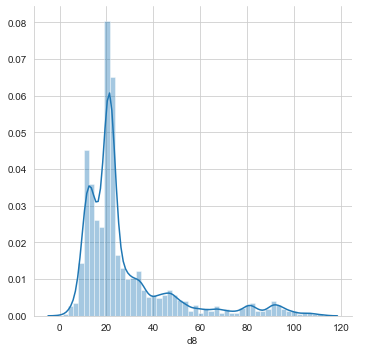

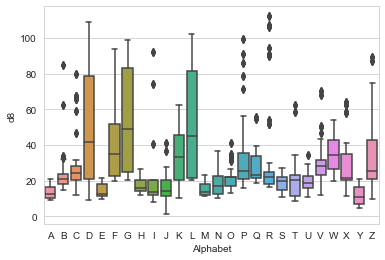

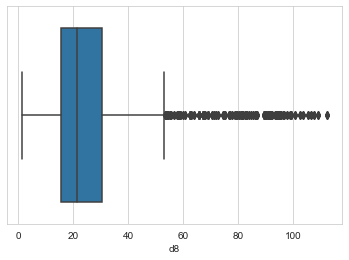

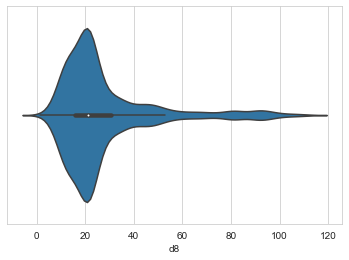

In [121]:
#d8

a=np.mean(data1['d8'])#mean
print(a)

b=np.median(data1['d8'])#median
print(b)

c=max(data1['d8']) #maximum value
print(c)

d=np.percentile(data1['d8'],25)#25th percentile
print(d)

e=np.percentile(data1['d8'],75)#75th percentile
print(e)

f=scipy.stats.iqr(data1['d8']) #interqunatile range
print(f)


sns.FacetGrid(data,size=5)\
.map(sns.distplot, 'd8').add_legend()
plt.show()

sns.boxplot(x='Alphabet', y='d8', data=data)
plt.show()

sns.boxplot(data['d8'])
plt.show()

sns.violinplot(x='d8', data=data)
plt.show()

# observation

In [214]:
#correlation between variables
data.corr()


,cosmi,cospr,cosrm,d1,d2,d3,d4,d5,d6,d7,d8
cosmi,1.000000,-0.000861,-0.022274,-0.337050,-0.086727,-0.115478,-0.037140,0.011544,0.110376,0.101547,-0.740350
cospr,-0.000861,1.000000,-0.025945,-0.045416,-0.011138,-0.068980,-0.194083,-0.045065,-0.671478,0.120841,0.119540
cosrm,-0.022274,-0.025945,1.000000,-0.309784,-0.488386,-0.045788,0.008852,-0.013439,0.096055,-0.804000,0.011064
d1,-0.337050,-0.045416,-0.309784,1.000000,0.602820,0.457364,0.432990,0.129055,0.015784,0.345941,0.473812
d2,-0.086727,-0.011138,-0.488386,0.602820,1.000000,0.732138,0.591890,0.096802,0.133352,0.635380,0.204868
d3,-0.115478,-0.068980,-0.045788,0.457364,0.732138,1.000000,0.808023,0.092137,0.241876,0.146437,0.163090
d4,-0.037140,-0.194083,0.008852,0.432990,0.591890,0.808023,1.000000,0.129470,0.444239,0.099082,0.094264
d5,0.011544,-0.045065,-0.013439,0.129055,0.096802,0.092137,0.129470,1.000000,0.098416,0.036524,0.033028
d6,0.110376,-0.671478,0.096055,0.015784,0.133352,0.241876,0.444239,0.098416,1.000000,-0.083260,-0.145891
d7,0.101547,0.120841,-0.804000,0.345941,0.635380,0.146437,0.099082,0.036524,-0.083260,1.000000,0.006786


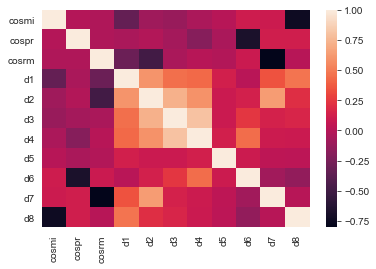

In [215]:
#lets plot the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Text(0.5, 1, 'Correlation Heatmap')

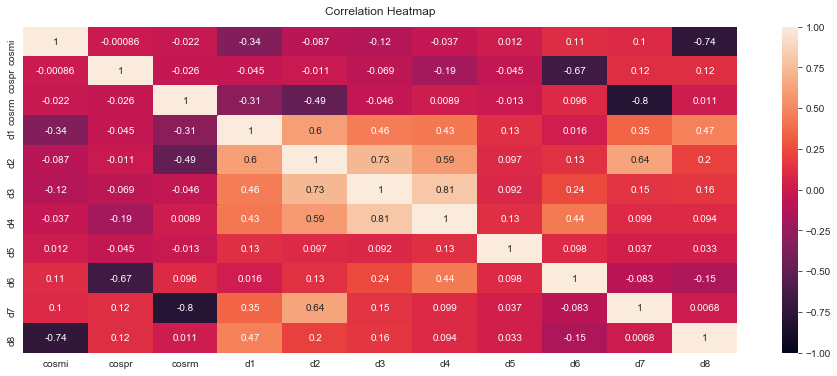

In [212]:
#can we combine heat maps and their actually correlation values?

#this plot i have reffered from 
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e#:~:text=))heatmap%20%3D%20sns.-,heatmap(dataframe.,18%7D%2C%20pad%3D16)%3B

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# observation


# Dimension Reduction

1. Dimension reduction is a very wonderful technique to visualize data in lower
   dimension. 
2. Mainly there are two techniques which i gonna use in this project that is
   1. PCA(stands for Principle component analysis)
      The idea is very simply, we want to find the direction f' such that             variance of projection of xi's over f' is maximum, here xi's are the data       points.
   2. T-sne is a complex idea, but intutively it tries to embedd higher               dimensional points to lower dimensions so that its easy to visualize           them.
      TSNE Stands for t distribution stochastic neighbourhood embedding.



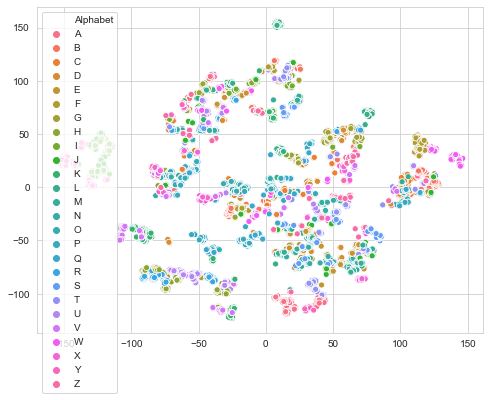

In [160]:
#APPLYING TSNE TO EMBEDD THE MULTI DIMENSIONAL SPACE TO 2D SPACE
#TSNE HELPS US TO VISUALIZE DATA IN LOWER DIMENSIONS

from sklearn.manifold import TSNE
x=TSNE(n_components=2,perplexity=50.0,learning_rate=200.0, n_iter=5000).fit_transform(data2)

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x[:,0],x [:,1], hue=data["Alphabet"], legend='full',ax=ax)
plt.show()

# observation of T-SNE

1.Its a bit complex and difficult to visualize 26 classes in 2D but TSNE
  did a god job if not a great job.
  
2.I have use different perplexities and different number of iteration and came 
  to this above conclusion because after this it was not changing much.

3.Now we dont have a clear picture but we can see some clusters and that is       very much interpreatble because some hand gestures are really close.

In [223]:
#Let's use PCA

from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pdata=pca.fit_transform(data2)
print(data2.shape)
print(pdata.shape)

(5200, 10)
(5200, 2)


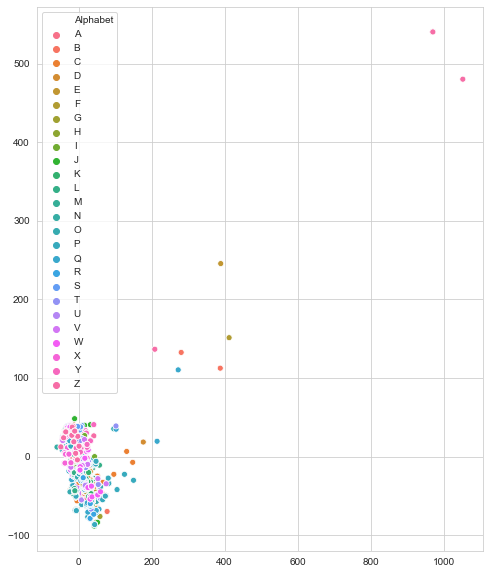

In [230]:
#plotting PCA result
fig_dims = (8, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(pdata[:,0],pdata [:,1], hue=data["Alphabet"], legend='full',ax=ax)
plt.show()

# observation


In [166]:
#making alphabet(target variable) sliced from the data
x2=data.iloc[0:5200,1:11]
x2.head()

y2=data['Alphabet']
y2.head()

0    A
1    A
2    A
3    A
4    A
Name: Alphabet, dtype: object

# MODEL TRAINING, EVALUATION AND HYPERPARAMETER TUNING

In [234]:
# LETS START WITH LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state=50)

model=GridSearchCV(LogisticRegression(max_iter=200),tuned_parameters,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.43430427841580677


C:\Users\DELL NOTEBOOK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

model=GridSearchCV(clf,tuned_parameters,scoring='accuracy')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.41217948717948716


Here i got 41% accuracy when maxdepth is 6, lets see if i increase max depth

In [236]:
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[4,5,10]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

model=GridSearchCV(clf,tuned_parameters,scoring='accuracy')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.7025641025641025


Increasing maxdepth is increasing accuracy and that simply means model is getting overfit

In [237]:
#let's use RANDOM FOREST classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf1 = RandomForestClassifier()
tuned_parameters1=[{'n_estimators':[100,200,300]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.4, random_state=50)

model=GridSearchCV(clf1,tuned_parameters1,scoring='accuracy')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9951923076923077


Random Forest works fairly well on the dataset, We got an accuracy of 99.47 that is very good.

In [196]:
#Let's evaluate a different performance metric
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf1 = RandomForestClassifier()
tuned_parameters1=[{'n_estimators':[100,200,300]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.4, random_state=50)

model=GridSearchCV(clf1,tuned_parameters1,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.995187605882291


We got an amazing weighted f1 score i.e 99.5%

In [243]:
#lets use Gradient Boosting Trees (gbdt)
from sklearn.ensemble import GradientBoostingClassifier
#clf2=GradientBoostingClassifier
#tuned_parameters1=[{'n_estimators':[100,200,300],'learning_rate':[0.1,0.2,0.3],'max_depth':[2,3,4]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.4, random_state=50)

#model=GridSearchCV(clf2,tuned_parameters1,scoring='f1_weighted')

#model.fit(X_train,y_train)

parameters = {
    "loss":"deviance",
    "learning_rate": [0.05, 0.1, 0.2],
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_depth":[2,3,5],
    "max_features":None,
    "criterion": "friedman_mse",
    "subsample":1.0,
    "n_estimators":[50,100,200]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring='accuracy',refit=False,cv=2, n_jobs=-1)

clf.fit(x2, y2)



ValueError: Parameter values for parameter (loss) need to be a sequence(but not a string) or np.ndarray.

# CONCLUSION

In [210]:
#LETS'S DEPLOY THE MODEL USING FLASK

print(X_test[0:1])

print(model.predict(X_test[0:1]))



        cospr     cosrm         d1         d2        d3         d4         d5  \
429  0.997851  0.993334  70.541584  84.060595  85.96089  79.627804  69.972969   

            d6         d7         d8  
429  30.277204  34.133608  27.394613  
['C']


# DEPLOYMENT

In [201]:
from sklearn.externals import joblib
import pickle as pkl

In [204]:
joblib.dump(model, 'model1.pkl')

['model1.pkl']

In [245]:
print("hello")

hello


In [246]:
import pandas as pd
import numpy as np

In [248]:
a=pd.DataFrame({"name": ['nishesh','kajol','kitu','kitu'],"age":[17,18,19,19]})
a

,name,age
0,nishesh,17
1,kajol,18
2,kitu,19
3,kitu,19


In [256]:
a['name'].unique().size

3

In [259]:
a.groupby('name')['age'].mean()

name
kajol      18
kitu       19
nishesh    17
Name: age, dtype: int64

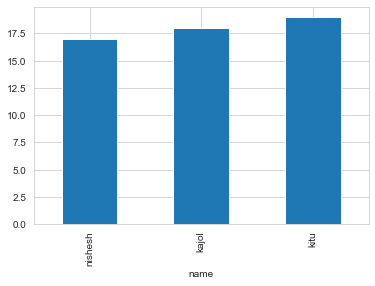

In [260]:
a.groupby('name')['age'].mean().sort_values().plot(kind='bar')